In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.xlsx
/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.csv


In [38]:
df = pd.read_csv('/kaggle/input/personality-prediction-data-introvert-extrovert/personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert
...,...,...,...,...,...,...,...,...
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert


In [39]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [41]:
#one hot encoding # Extrovert = 1 Introvert = 0
def onehotencoding(personality : str) -> int:
    """
    converts Extrovert = 1 Introvert = 0
    """
    if (personality == "Extrovert"):
        return 1
    if (personality == "Introvert"):
        return 0
    return -1
df['Personality 1:E 0:I'] = df['Personality'].apply(onehotencoding)
df = df.drop(columns=['Personality'])
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality 1:E 0:I
0,3,Yes,6,7,No,14,5,1
1,2,No,8,6,No,7,8,1
2,1,No,9,4,No,9,3,1
3,8,No,0,0,Yes,9,3,0
4,5,Yes,3,0,No,2,6,0
...,...,...,...,...,...,...,...,...
4995,5,No,6,5,No,14,8,1
4996,7,No,2,3,Yes,2,5,0
4997,2,No,7,3,No,11,3,1
4998,2,Yes,9,3,No,15,7,1


In [42]:
# converting Yes = 1 No = 0
def convertingBooleans(boolval : str) -> int:
    if boolval == "Yes":
        return 1
    if boolval == "No":
        return 0
    return - 1
df['Stage_fear'] = df['Stage_fear'].astype(str).apply(convertingBooleans)
df['Drained_after_socializing'] = df['Drained_after_socializing'].astype(str).apply(convertingBooleans)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality 1:E 0:I
0,3,1,6,7,0,14,5,1
1,2,0,8,6,0,7,8,1
2,1,0,9,4,0,9,3,1
3,8,0,0,0,1,9,3,0
4,5,1,3,0,0,2,6,0
...,...,...,...,...,...,...,...,...
4995,5,0,6,5,0,14,8,1
4996,7,0,2,3,1,2,5,0
4997,2,0,7,3,0,11,3,1
4998,2,1,9,3,0,15,7,1


In [43]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality 1:E 0:I
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,4.969000,0.448200,4.995200,3.523400,0.550600,7.253200,4.759800,0.49960
std,3.033922,0.497359,2.862449,2.088618,0.497483,4.045783,2.780369,0.50005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,0.000000,3.000000,2.000000,0.000000,5.000000,3.000000,0.00000
50%,5.000000,0.000000,5.000000,4.000000,1.000000,7.000000,5.000000,0.00000
75%,7.000000,1.000000,7.000000,5.000000,1.000000,10.000000,7.000000,1.00000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.00000


<Axes: >

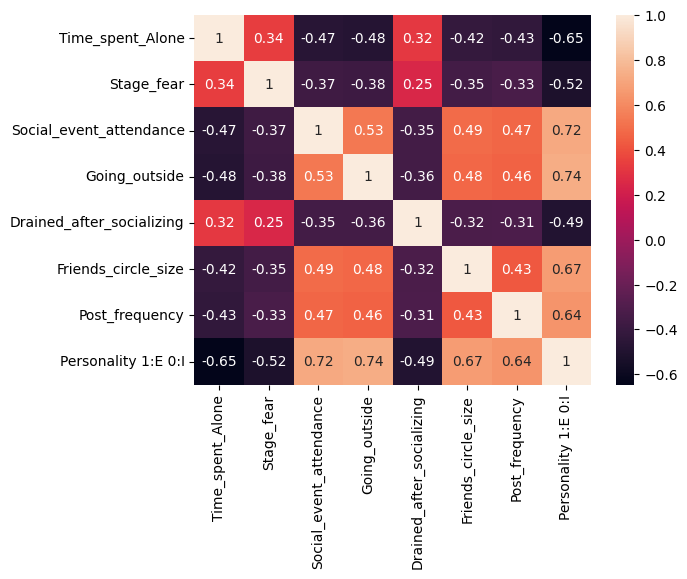

In [47]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

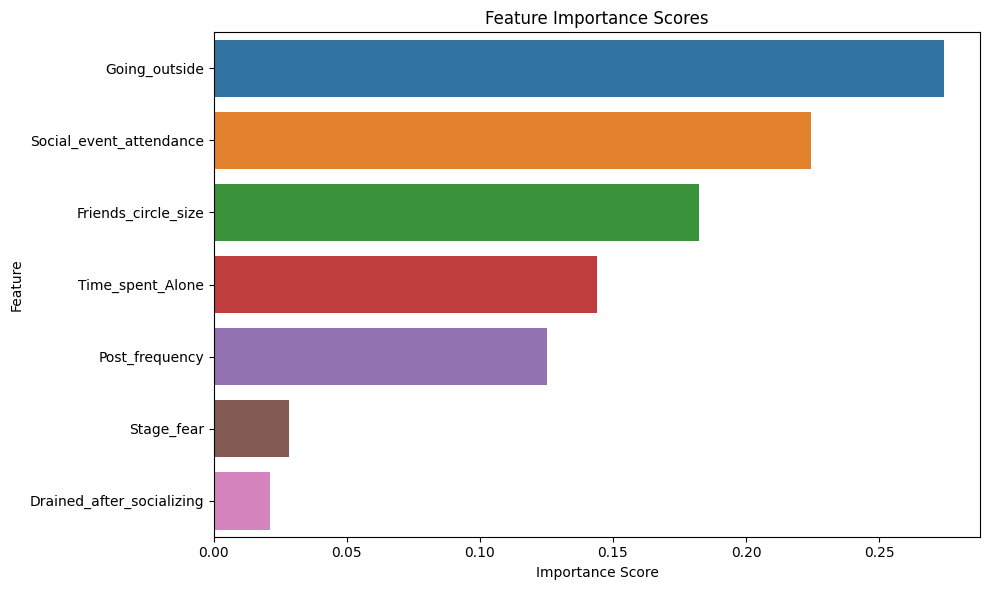

,Feature,Importance
3,Going_outside,0.274241
2,Social_event_attendance,0.224462
5,Friends_circle_size,0.182448
0,Time_spent_Alone,0.144115
6,Post_frequency,0.125111
1,Stage_fear,0.028400
4,Drained_after_socializing,0.021222


In [55]:
# Feature İmportance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def calculate_feature_importance(X, y, task_type='classification', n_estimators=100, random_state=42):
    """
    Calculate and visualize feature importance using Random Forest.
    
    Parameters:
    -----------
    X : pandas.DataFrame or numpy.ndarray
        Feature matrix
    y : pandas.Series or numpy.ndarray
        Target variable
    task_type : str, default='classification'
        Type of task: 'classification' or 'regression'
    n_estimators : int, default=100
        Number of trees in the random forest
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    feature_importance_df : pandas.DataFrame
        DataFrame containing feature names and their importance scores
    """
    # Convert inputs to numpy arrays if they are pandas objects
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns
        X = X.values
    else:
        feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
    if isinstance(y, pd.Series):
        y = y.values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    # Initialize and train the appropriate Random Forest model
    if task_type.lower() == 'classification':
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state
        )
    else:
        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            random_state=random_state
        )
    
    rf_model.fit(X_train, y_train)
    
    # Get feature importance scores
    importance_scores = rf_model.feature_importances_
    
    # Create DataFrame with feature names and importance scores
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })
    
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(
        'Importance', ascending=False
    )
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=feature_importance_df
    )
    plt.title('Feature Importance Scores')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    return feature_importance_df
X = df.drop('Personality 1:E 0:I', axis=1)
y = df['Personality 1:E 0:I']
importance_df = calculate_feature_importance(
        X, y,
        task_type='classification',
        n_estimators=1000
    )
importance_df


Train Accuracy: 0.9978
Test Accuracy: 0.9950

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.99      1.00      1.00       504

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



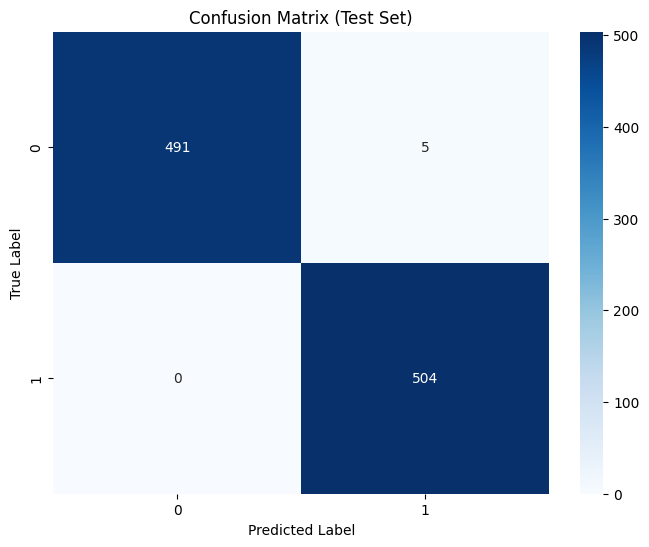


Cross-validation scores: [0.99125 0.99125 0.99125 0.995   0.995  ]
Average CV score: 0.9928 (+/- 0.0037)


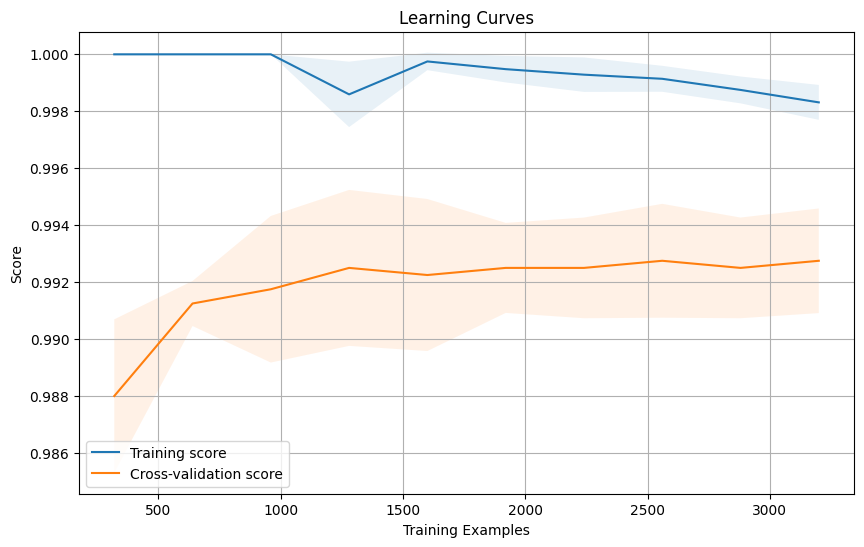

In [65]:
# XGBOOST Modeling
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score,learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def train_personality_predictor(X, y, test_size=0.2, random_state=42):
    """
    Train an XGBoost model for personality prediction.
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature matrix
    y : pandas.Series
        Target variable (personality type)
    test_size : float, default=0.2
        Proportion of data to use for testing
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    model : XGBoost model
        Trained XGBoost model
    X_train : pandas.DataFrame
        Training features
    X_test : pandas.DataFrame
        Test features
    y_train : pandas.Series
        Training labels
    y_test : pandas.Series
        Test labels
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Set up XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'learning_rate': 0.1,
        'max_depth': 6,
        'n_estimators': 100,
        'random_state': random_state,
        'eval_metric': 'logloss'
    }
    
    # Initialize and train XGBoost model
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    return model, X_train, X_test, y_train, y_test

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate the trained model and print performance metrics.
    
    Parameters:
    -----------
    model : XGBoost model
        Trained XGBoost model
    X_train : pandas.DataFrame
        Training features
    X_test : pandas.DataFrame
        Test features
    y_train : pandas.Series
        Training labels
    y_test : pandas.Series
        Test labels
    """
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracy for both train and test sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print(f"\nTrain Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Print classification report for test set
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    # Create confusion matrix for test set
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Test Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Plot learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title('Learning Curves')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

X = df.drop('Personality 1:E 0:I', axis=1)
y = df['Personality 1:E 0:I']
    
# Train the model
model, X_train, X_test, y_train, y_test = train_personality_predictor(X, y)
evaluate_model(model, X_train, X_test, y_train, y_test)

In [ ]:
#Consistency:
#Similar performance across all cross-validation folds (0.99125 - 0.995)
#Low standard deviation (±0.0037) shows the model is consistent
#Overfitting Assessment:
#Cross-validation scores are very high and consistent
#Low standard deviation indicates the model performs similarly on different data splits
#This suggests the model is NOT overfitting
#Model Reliability:
#99.28% average accuracy
#Very low variation (±0.37%)
#These results indicate the model is reliable